In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape


(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## Data Visualisation

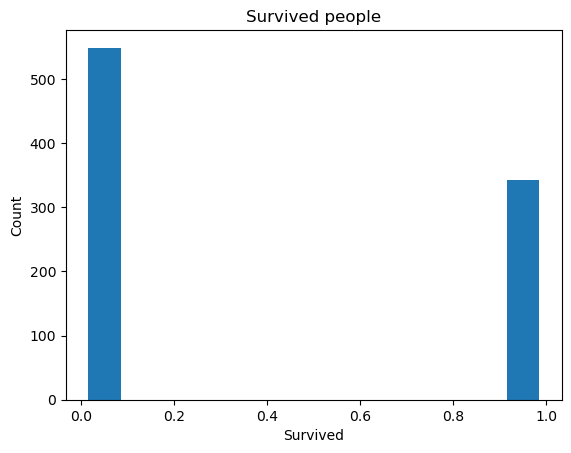

In [10]:
fig = plt.hist(df['Survived'],rwidth=0.7)
plt.title('Survived people')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

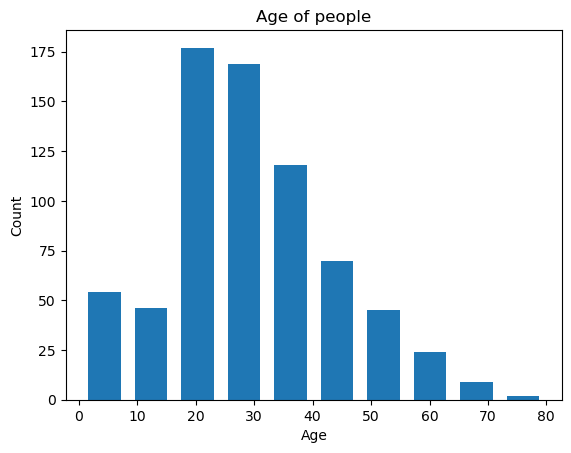

In [11]:
fig = plt.hist(df['Age'],rwidth=0.7,)
plt.title('Age of people')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

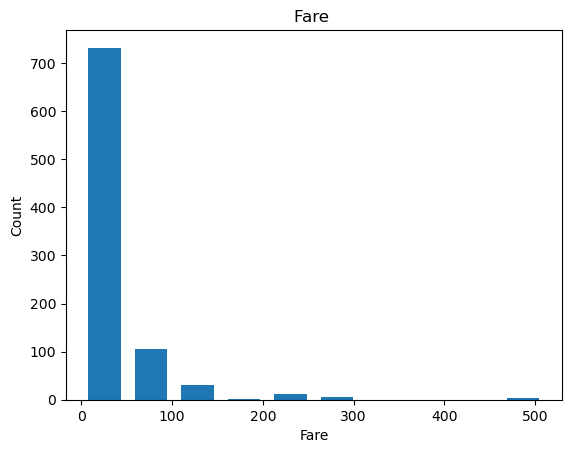

In [12]:
fig = plt.hist(df['Fare'],rwidth=0.7)
plt.title('Fare ')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

<AxesSubplot:ylabel='Age'>

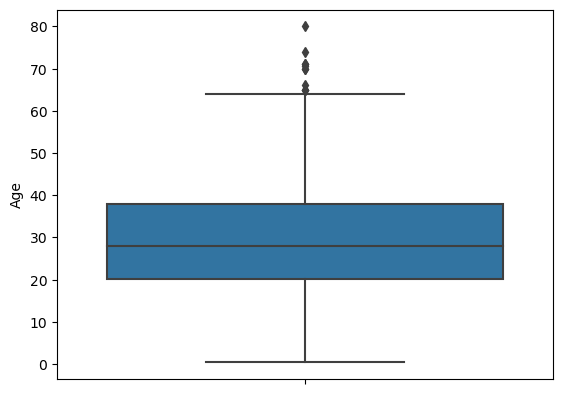

In [13]:
sns.boxplot(y=df['Age'])

<AxesSubplot:ylabel='Fare'>

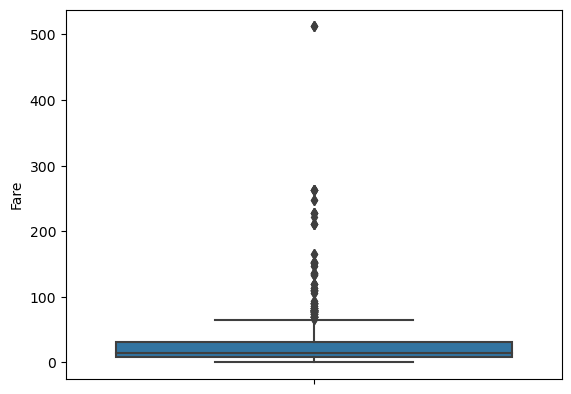

In [14]:
sns.boxplot(y=df['Fare'])

<AxesSubplot:ylabel='SibSp'>

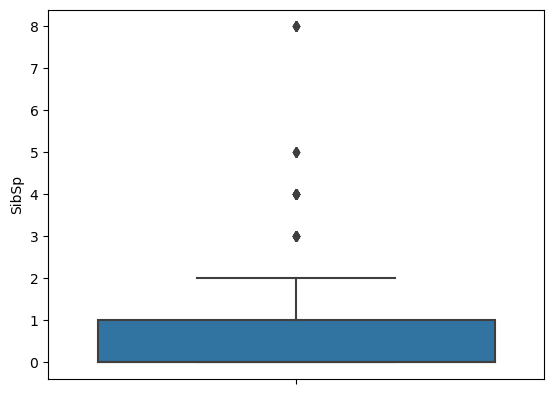

In [15]:
sns.boxplot(y=df['SibSp'])

<AxesSubplot:ylabel='Parch'>

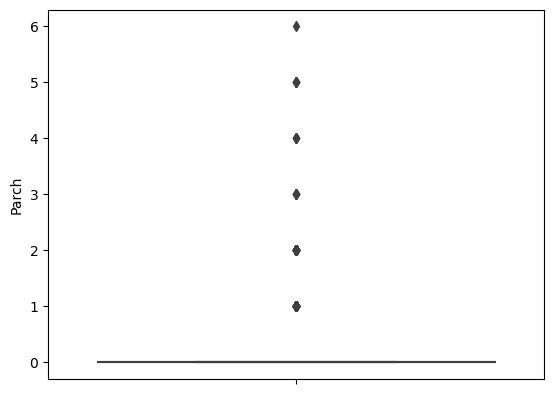

In [16]:
sns.boxplot(y=df['Parch'])

In [17]:
print(df['Pclass'].skew())
print(df['Age'].skew())
print(df['SibSp'].skew())
print(df['Fare'].skew())





-0.6305479068752845
0.38910778230082704
3.6953517271630565
4.787316519674893


In [18]:
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df['Age'] = mean_imputer.fit_transform(df[['Age']])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [20]:
from sklearn.impute import SimpleImputer
most_frequent = SimpleImputer(strategy='most_frequent')
df['Embarked'] = most_frequent.fit_transform(df[['Embarked']])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [21]:
Q1 = df['Age'].quantile(0.25)
print('Q1',Q1)

Q3 = df['Age'].quantile(0.75)
print('Q3',Q3)


IQR = Q3-Q1
print('IQR',IQR)

lower_limit = Q1 - (IQR*1.5)
print('lower_limit',lower_limit)

upper_limit = Q3 + (IQR*1.5)
print('upper_limit',upper_limit)

Q1 22.0
Q3 35.0
IQR 13.0
lower_limit 2.5
upper_limit 54.5


In [22]:
Q1 = df['Fare'].quantile(0.25)
print('Q1',Q1)

Q3 = df['Fare'].quantile(0.75)
print('Q3',Q3)


IQR = Q3-Q1
print('IQR',IQR)

lower_limit = Q1 - (IQR*1.5)
print('lower_limit',lower_limit)

upper_limit = Q3 + (IQR*1.5)
print('upper_limit',upper_limit)

Q1 7.9104
Q3 31.0
IQR 23.0896
lower_limit -26.724
upper_limit 65.6344


In [23]:
df[(df['Age']<lower_limit)|(df['Age']>upper_limit)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
33,0,2,male,66.0,0,0,10.5000,S
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
672,0,2,male,70.0,0,0,10.5000,S
745,0,1,male,70.0,1,1,71.0000,S
851,0,3,male,74.0,0,0,7.7750,S


In [24]:
df[(df['Fare']<lower_limit)|(df['Fare']>upper_limit)]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [25]:
# Replaced based on IQR

from feature_engine.outliers import Winsorizer

win = Winsorizer(capping_method ='iqr',tail= 'both',fold = 1.5)

df['Age'] = win.fit_transform(df[['Age']])

In [26]:
df['Age'].iloc[33]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
df['Fare']=np.log(df['Fare']+0.5)
df['Fare'].skew()

0.056631553586926

In [28]:
df['SibSp']=1/(df['SibSp']+0.01)
df['SibSp'].skew()

-0.7848614612586683

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,0.990099,0,2.047693,S
1,1,1,0,38.000000,0.990099,0,4.273652,C
2,1,3,0,26.000000,100.000000,0,2.131203,S
3,1,1,0,35.000000,0.990099,0,3.981549,S
4,0,3,1,35.000000,100.000000,0,2.145931,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,100.000000,0,2.602690,S
887,1,1,0,19.000000,100.000000,0,3.417727,S
888,0,3,0,29.699118,0.990099,2,3.175968,S
889,1,1,1,26.000000,100.000000,0,3.417727,C


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,0.990099,0,2.047693,2
1,1,1,0,38.000000,0.990099,0,4.273652,0
2,1,3,0,26.000000,100.000000,0,2.131203,2
3,1,1,0,35.000000,0.990099,0,3.981549,2
4,0,3,1,35.000000,100.000000,0,2.145931,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,100.000000,0,2.602690,2
887,1,1,0,19.000000,100.000000,0,3.417727,2
888,0,3,0,29.699118,0.990099,2,3.175968,2
889,1,1,1,26.000000,100.000000,0,3.417727,0


In [31]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
print(len(X_train),len(X_test))
X_train

712 179


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
140,3,0,29.699118,100.000000,2,2.756574,0
439,2,1,31.000000,100.000000,0,2.397895,2
817,2,1,31.000000,0.990099,1,3.624453,0
378,3,1,20.000000,100.000000,0,1.506851,0
491,3,1,21.000000,100.000000,0,2.047693,2
...,...,...,...,...,...,...,...
835,1,0,39.000000,0.990099,1,4.426741,0
192,3,0,19.000000,0.990099,0,2.122764,2
629,3,1,29.699118,100.000000,0,2.108187,1
559,3,0,36.000000,0.990099,0,2.884801,2


In [33]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

# Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model,X,y,cv=5)
print(scores)
scores.mean()

0.7935393258426966
0.8044692737430168
[0.78212291 0.79775281 0.78089888 0.78089888 0.80898876]


0.7901324461741259

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[92, 18],
       [17, 52]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



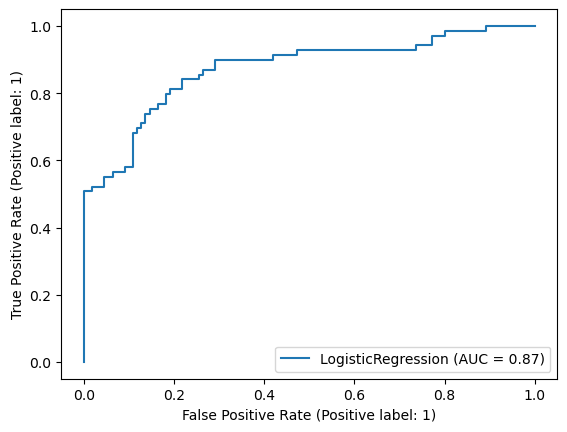

In [37]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,X_test,y_test)
plt.show()

In [38]:
test = pd.read_csv('test.csv')
test
test1 = test.copy()

In [39]:
test = test.drop(columns=['PassengerId','Name','Ticket','Cabin'])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [40]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
test['Age'] = mean_imputer.fit_transform(test[['Age']])
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [41]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [42]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [43]:
test = test.dropna()
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test['Sex'] = le.fit_transform(test['Sex'])
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,Q
1,3,0,47.00000,1,0,7.0000,S
2,2,1,62.00000,0,0,9.6875,Q
3,3,1,27.00000,0,0,8.6625,S
4,3,0,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,S
414,1,0,39.00000,0,0,108.9000,C
415,3,1,38.50000,0,0,7.2500,S
416,3,1,30.27259,0,0,8.0500,S


In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test['Embarked'] = le.fit_transform(test['Embarked'])
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [46]:
test = sc.transform(test)

In [47]:
Survived = log_model.predict(test)
Survived

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [49]:
submit = pd.DataFrame({'PassengerId':test1['PassengerId'],'Survived':Survived})
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [50]:
submit.to_csv('submit.csv')